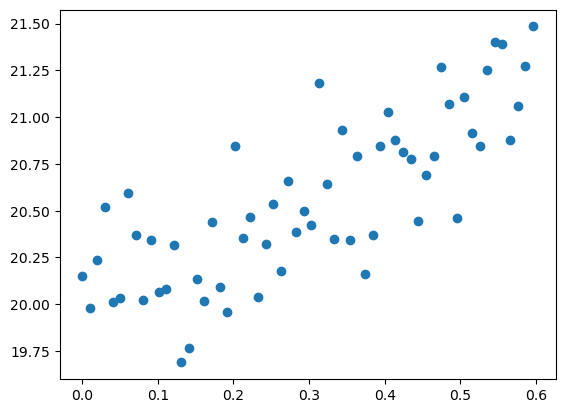

In [46]:
import matplotlib.pyplot as plt
import numpy as np

x = []
y = []

with open('lab_1_train.csv', 'r') as csv_train:
    for line in csv_train.readlines()[1:]:
        nums = line.split(',')
        x.append(float(nums[1]))
        y.append(float(nums[2]))

plt.scatter(x, y)
plt.show()

In [47]:
def predict(a0, a1, x):
    return a0 + a1 * x

def mse(a0, a1, x, y):
    n = len(x)
    return sum((predict(a0, a1, x[i]) - y[i]) ** 2 for i in range(n)) / float(n)

In [76]:
import random

# a more reasonable initial estimation
# a1 = (y[-1] - y[0]) / (x[-1] - x[0])
# a0 = y[0] - a1 * x[0]

a1 = random.random()
a0 = random.random()

learning_rate = 0.01
eps = 0.000001
loss = 20.0
prev_loss = 10.0
n = len(x)

print(f"initial loss: {mse(a0, a1, x, y)}")

while (abs(prev_loss - loss) > eps):
    grad_a0 = learning_rate * sum(predict(a0, a1, x[i]) - y[i] for i in range(n)) / float(n)
    grad_a1 = learning_rate * sum((predict(a0, a1, x[i]) - y[i]) * x[i] for i in range(n)) / float(n)


    a0 -= grad_a0
    a1 -= grad_a1

    prev_loss = loss
    loss = mse(a0, a1, x, y)

    print(f"a0 = {a0}, a1 = {a1}, loss = {loss}")


initial loss: 426.7709315488398
a0 = 0.34685004496011984, a1 = 1.0791776756646891, loss = 413.5073265308316
a0 = 0.5501726054837491, a1 = 1.2321894046614208, loss = 400.65896139064574
a0 = 0.7503131532831852, a1 = 1.3827524371902906, loss = 388.21283486360676
a0 = 0.9473218928995901, a1 = 1.5309054212918667, loss = 376.1563527586274
a0 = 1.1412482366655265, a1 = 1.676686395151977, loss = 364.47731521259965
a0 = 1.332140817205731, a1 = 1.8201327967250072, loss = 353.16390434387125
a0 = 1.5200474997406361, a1 = 1.9612814732053427, loss = 342.2046722922839
a0 = 1.7050153941957396, a1 = 2.100168690349358, loss = 331.5885296336926
a0 = 1.887090867119897, a1 = 2.236830141650307, loss = 321.3047341572181
a0 = 2.0663195534155476, a1 = 2.371300957368436, loss = 311.3428799938924
a0 = 2.242746367883837, a1 = 2.5036157134186046, loss = 301.6928870856966
a0 = 2.416415516587569, a1 = 2.633808440117666, loss = 292.34499098431445
a0 = 2.5873705080348457, a1 = 2.7619126307938133, loss = 283.2897329692

loss function on test data: 0.07482188067584547


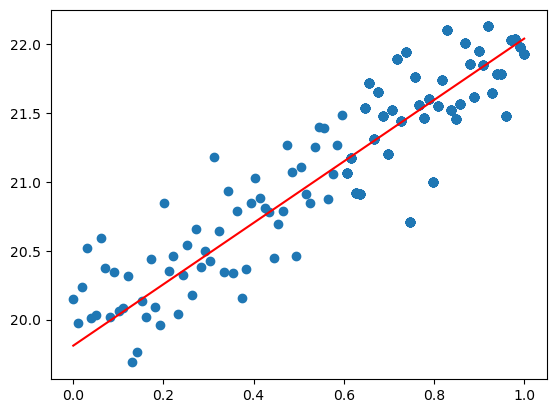

In [77]:
x_test = []
y_test = []

with open('lab_1_test.csv', 'r') as csv_test:
    for line in csv_test.readlines()[1:]:
        nums = line.split(',')
        x_test.append(float(nums[1]))
        y_test.append(float(nums[2]))

print(f"loss function on test data: {mse(a0, a1, x_test, y_test)}")

x.extend(x_test)
y.extend(y_test)

plt.scatter(x, y)
plt.plot([x[0], x[-1]], [predict(a0, a1, x[0]), predict(a0, a1, x[-1])], color='r')
plt.show()